In [1]:
import numpy as np
from sklearn.svm import SVR 
import matplotlib.pyplot as plt 
import pandas as pd 

%matplotlib inline

In [3]:
# Google Stock Prices Dataset (1 month stock prices)
df = pd.read_csv('GOOG.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-08-01,1214.030029,1234.109985,1205.719971,1209.010010,1209.010010,1698500
1,2019-08-02,1200.739990,1206.900024,1188.939941,1193.989990,1193.989990,1645100
2,2019-08-05,1170.040039,1175.239990,1140.140015,1152.319946,1152.319946,2597500
3,2019-08-06,1163.310059,1179.959961,1160.000000,1169.949951,1169.949951,1709400
4,2019-08-07,1156.000000,1178.444946,1149.624023,1173.989990,1173.989990,1444300


In [4]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
17,2019-08-26,1157.260010,1169.469971,1152.959961,1168.890015,1168.890015,1226100
18,2019-08-27,1180.530029,1182.400024,1161.449951,1167.839966,1167.839966,1077200
19,2019-08-28,1161.709961,1176.420044,1157.300049,1171.020020,1171.020020,802000
20,2019-08-29,1181.119995,1196.060059,1181.119995,1192.849976,1192.849976,1088400
21,2019-08-30,1198.500000,1198.500000,1183.802979,1188.099976,1188.099976,1129800


In [5]:
def get_data(df):  
    data = df.copy()
    data['Date'] = data['Date'].str.split('-').str[2]
    data['Date'] = pd.to_numeric(data['Date'])
    return [ data['Date'].tolist(), data['Close'].tolist() ] 

dates, prices = get_data(df)

In [6]:
def predict_prices(dates, prices, x):
    dates = np.reshape(dates,(len(dates), 1)) # convert to 1xn dimension
    x = np.reshape(x,(len(x), 1))
    
    svr_lin  = SVR(kernel='linear', C=1e3)
    svr_poly = SVR(kernel='poly', C=1e3, degree=2)
    svr_rbf = SVR(kernel='rbf', C=1e3, gamma='auto')
    
    # Fit  3 regression models
    svr_lin .fit(dates, prices)
    svr_poly.fit(dates, prices)
    svr_rbf.fit(dates, prices)
    
    plt.figure(figsize=(15,8))
    
    plt.scatter(dates, prices, c='k', label='Data')
    plt.plot(dates, svr_lin.predict(dates), c='green', label='Linear model')
    plt.plot(dates, svr_rbf.predict(dates), c='red', label='RBF model')    
    plt.plot(dates, svr_poly.predict(dates), c='blue', label='Polynomial model')
    
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Support Vector Regression Models')
    plt.legend()
    plt.show()
    
    return svr_rbf.predict(x)[0], svr_lin.predict(x)[0], svr_poly.predict(x)[0]



/home/costa/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


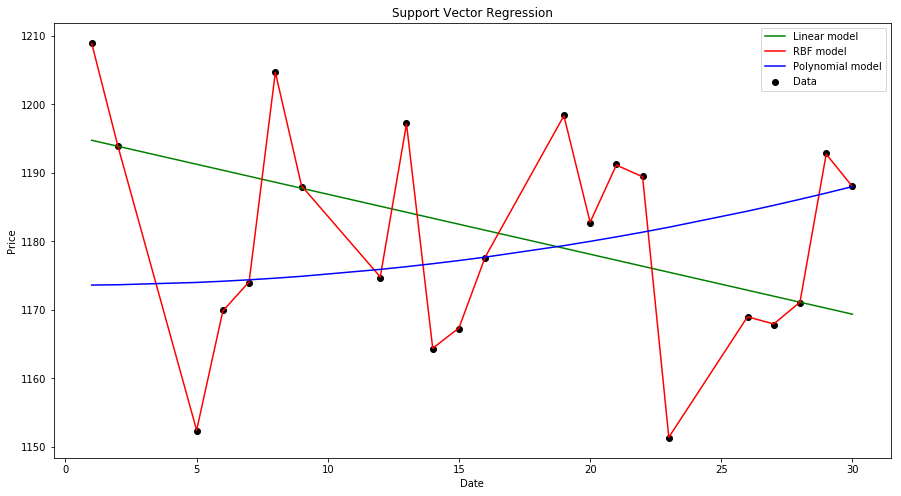

In [7]:
predicted_price = predict_prices(dates, prices, [31]) 

In [9]:
print("The stock close price for 31st August is:")
print("RBF kernel: $", str(predicted_price[0]))
print("Linear kernel: $", str(predicted_price[1]))
print("Polynomial kernel: $", str(predicted_price[2]))

The stock close price for 31st August is:
RBF kernel: $ 1181.065136777532
Linear kernel: $ 1168.4927157692623
Polynomial kernel: $ 1188.9755970428457


In [12]:
# Now,taking 2 months Google Stock Price Dataset
df2 = pd.read_csv('GOOG_2.csv')
df2.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-07-01,1098.000000,1107.579956,1093.703003,1097.949951,1097.949951,1436300
1,2019-07-02,1102.239990,1111.770020,1098.170044,1111.250000,1111.250000,991600
2,2019-07-03,1117.410034,1126.760010,1113.859985,1121.579956,1121.579956,767000
3,2019-07-05,1117.800049,1132.880005,1116.140015,1131.589966,1131.589966,1264300
4,2019-07-08,1125.170044,1125.979980,1111.209961,1116.349976,1116.349976,1236400


In [13]:
df2.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
39,2019-08-26,1157.260010,1169.469971,1152.959961,1168.890015,1168.890015,1226100
40,2019-08-27,1180.530029,1182.400024,1161.449951,1167.839966,1167.839966,1077200
41,2019-08-28,1161.709961,1176.420044,1157.300049,1171.020020,1171.020020,802000
42,2019-08-29,1181.119995,1196.060059,1181.119995,1192.849976,1192.849976,1088400
43,2019-08-30,1198.500000,1198.500000,1183.802979,1188.099976,1188.099976,1129800


In [14]:
dates, prices = get_data(df2)

/home/costa/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


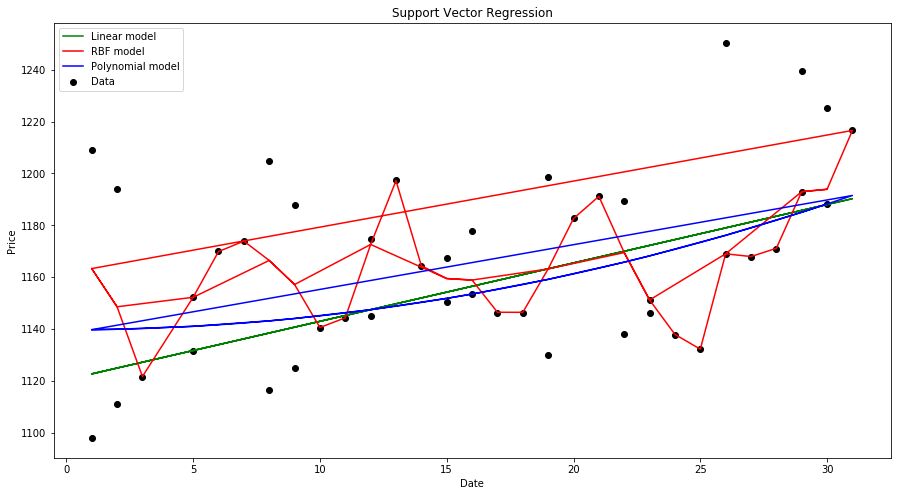

In [15]:
predicted_price = predict_prices(dates, prices, [31])

In [16]:
print("The stock close price for 31st August is:")
print("RBF kernel: $", str(predicted_price[0]))
print("Linear kernel: $", str(predicted_price[1]))
print("Polynomial kernel: $", str(predicted_price[2]))

The stock close price for 31st August is:
RBF kernel: $ 1216.580116413219
Linear kernel: $ 1190.2523763993795
Polynomial kernel: $ 1191.4886737918519
